In [2]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

# Домашнее задание по курсу анализа данных
Версия от 11.12.2021

Всего 50 баллов = 40 основных + 10 дополнительных

**Оценка**  = (Количество баллов за работу*2 + 20)/10

**Мягкий дедлайн: 18.12.2021  23:59**

**Жесткий дедлайн: 20.12.2021  8:59**

Присылать решение ссылкой на ваш **github** в телеграмм **@Aleron75** или на почту **milenkin.aa@phystech.edu**

**Автор:** Миленькин Александр

In [3]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head()

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет и, используя класстерный анализ, разбить пользователей на сегменты. Сделать выводы о причинах такой кластеризации.

# Чистка датасета (5 баллов)
* Есть ли дубли в данных? Если есть удалить.
* Найти и удалить выбросы по признаку `home_cost`. (Их не больше 15-х, не меньше 3-х)

In [3]:
#ищем дубли
data.duplicated().sum()
#их нет

0

{'whiskers': [<matplotlib.lines.Line2D at 0x7f949df55030>,
 'caps': [<matplotlib.lines.Line2D at 0x7f949df55570>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f949df0fb20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f949df55ab0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f949df55d50>],
 'means': []}

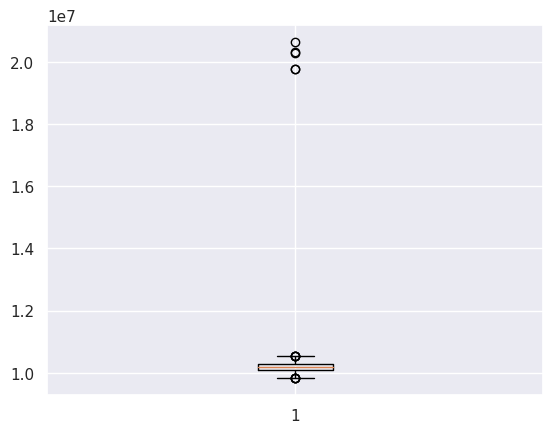

In [4]:
#ищем выбросы
plt.boxplot(data['home_cost'])

In [5]:
#используем z-score
outliers=[]
def detect_outlier(data):
    
    threshold= 3
    mean_1 = np.mean(data)
    std_1 =np.std(data)
    
    
    for d in data:
        z_score= np.abs((d - mean_1)/std_1)
        if z_score > threshold:
            outliers.append(d)
    return outliers       

In [6]:
#мы нашли 5 выбросов
outliers = detect_outlier(data['home_cost'])
len(outliers)

5

In [7]:
#Удаляем строки с выбросами
data = data[data['home_cost'].isin(outliers) == False]

# Проверка гипотез (15 баллов)

<div class="alert alert-info">

<b>Описание заданий раздела:</b>    
    
В этом разделел вам предстоит:
* Проверить предложенные утверждения визуально.
* Применить подходящий статистический критерий, чтобы окончательно доказать или опровергнуть гипотезы на снове этих данных.

<div class="alert alert-warning">
    
* Правда ли женщины в среднем имеют более высокую зарплату, чем мужчины?

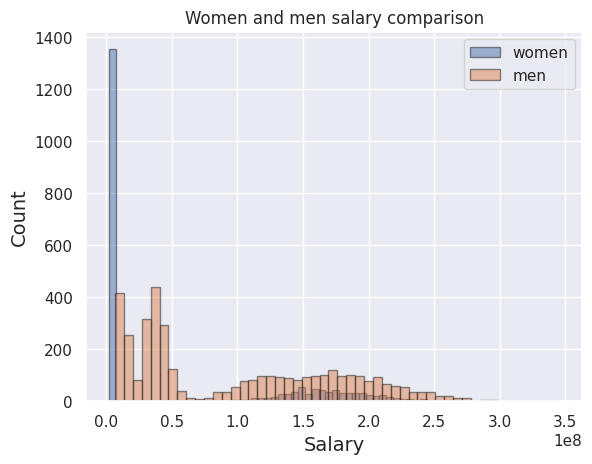

In [8]:
plt.hist(data['salary'].where(data['sex'] == 0),bins=50, alpha = 0.5,ec="k", label="women")
plt.hist(data['salary'].where(data['sex'] == 1), bins=50,alpha = 0.5,ec="k", label="men")

plt.xlabel("Salary", size=14)
plt.ylabel("Count", size=14)
plt.title("Women and men salary comparison")
plt.legend(loc='upper right')


Из графика видно, что большинство женщин получают минимальную зарплату, тогла как доходы мужчин распределены более равномерно. Меньше женщин, чем мужчин получает средннюю и высокую зарплату.

In [9]:
women = np.mean(data['salary'].where(data['sex'] == 0))
men = np.mean(data['salary'].where(data['sex'] == 1))

In [10]:
print(f'Средняя зарплата женщин = {women}, средняя зарплата мужчин = {men}')

Средняя зарплата женщин = 57748624.684515834, средняя зарплата мужчин = 98459581.64085492


Если сравнить средние значение средней зарплаты среди мужчин и женщин, можно сделать вывод, что женщины получают в среднем меньше, чем мужчины.

<div class="alert alert-warning">
    
* Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?

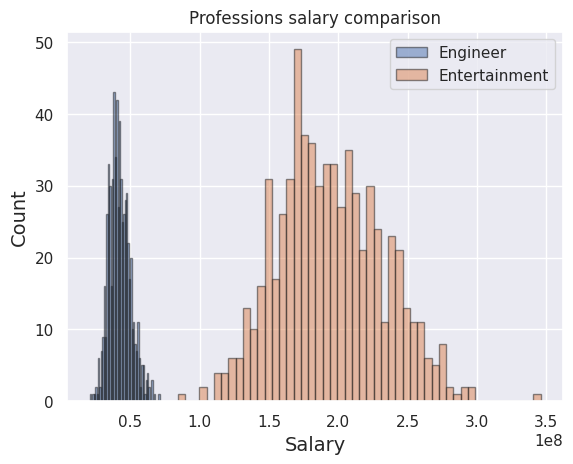

In [11]:
plt.hist(data['salary'].where(data['profession'] == 'Engineer'),bins=50, alpha = 0.5,ec="k", label="Engineer")
plt.hist(data['salary'].where(data['profession'] == 'Entertainment'), bins=50,alpha = 0.5,ec="k", label="Entertainment")

plt.xlabel("Salary", size=14)
plt.ylabel("Count", size=14)
plt.title("Professions salary comparison")
plt.legend(loc='upper right')


Судя по графику, работники сферы развлечения получают более выоские зарплаты, чем инженеры. 

In [57]:
engineers = round(np.mean(data['salary'].where(data['profession'] == 'Engineer')))
enterntainment = round(np.mean(data['salary'].where(data['profession'] == 'Entertainment')))

In [58]:
print(f'Средняя зарплата инженеров = {engineers}, средняя зарплата работников в сфере развлечения = {enterntainment}')

Средняя зарплата инженеров = 42181027, средняя зарплата работников в сфере развлечения = 194005269


Мыопровергли теорию о том, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment).

<div class="alert alert-warning">
    
* Правда ли, что те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей?

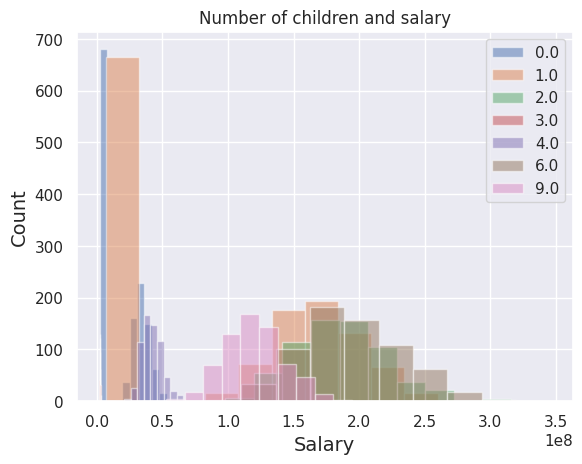

In [115]:
# Сгруппируем жителей по количеству детей и нарисуем график
data.groupby("children")['salary'].hist(alpha = 0.5, legend = True)
plt.xlabel("Salary", size=14)
plt.ylabel("Count", size=14)
plt.title("Number of children and salary")
plt.legend(loc='upper right')

На графике видно, что те, у кого 0-1 ребенок зарабатывают меньше, чем те, у кого много детей, но затерялся столбец с данными о тех, у кого 2-3 детей

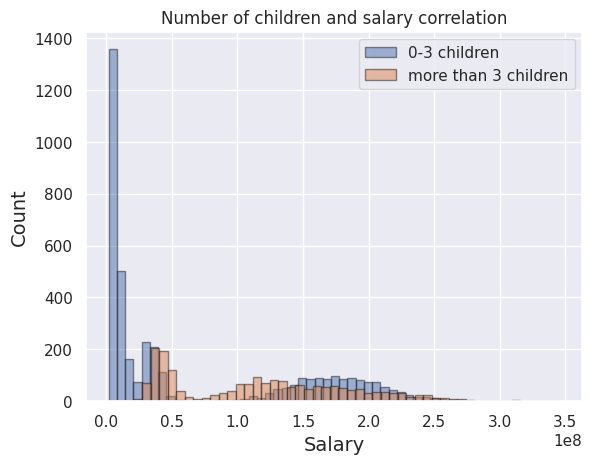

In [119]:
# Нарисуем более понятный график
plt.hist(data['salary'].where(data['children'] <= 3),bins=50, alpha = 0.5,ec="k", label="0-3 children")
plt.hist(data['salary'].where(data['children'] > 3), bins=50,alpha = 0.5,ec="k", label="more than 3 children")

plt.xlabel("Salary", size=14)
plt.ylabel("Count", size=14)
plt.title("Number of children and salary correlation")
plt.legend(loc='upper right')

Из графика видно, что средняя зарплата людей более чем с 3 детьми выше, чем у тех, у кого 0-3 ребенка.

In [122]:
less = round(np.mean(data['salary'].where(data['children'] <= 3))) # средняя зарплата тех, у кого 0-3 ребенка
more = round(np.mean(data['salary'].where(data['children'] > 3))) # средняя зарплата людей с >3 детьми

print(f'Средняя зарплата малодетных = {less}, средняя зарплата многодетных = {more}')

Средняя зарплата малодетных = 67500796, средняя зарплата многодетных = 119251725


Действительно, средняя зарплата людей более чем с 3 детьми выше, чем у тех, у кого 0-3 ребенка.

<div class="alert alert-warning">
    
* Правда ли, что дома художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?

In [134]:
# создадим два отдельных датасета со стоимостями домов художников и адвокатов
artists = data['home_cost'].where(data['profession'] == 'Artist')
lawyers = data['home_cost'].where(data['profession'] == 'Lawyer')

Text(0.5, 1.0, 'Artists ans lawyers home costs')

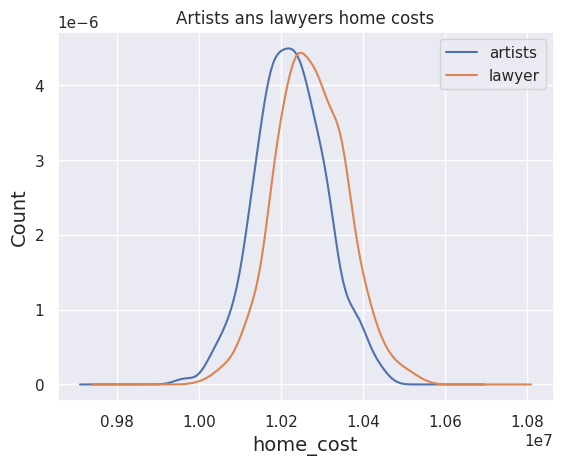

In [136]:
# нарисуем kernel density estimation (KDE)
artists.plot.kde(label = 'artists')
lawyers.plot.kde(label = 'lawyer')
plt.legend(loc='upper right')

plt.xlabel("home_cost", size=14)
plt.ylabel("Count", size=14)
plt.title("Artists ans lawyers home costs")

Из графика видно, что у художников дома дешевле, чем у адвокатов

In [140]:
artists_mean = round(np.mean(artists)) # средняя стоимость домов художников
lawyers_mean = round(np.mean(lawyers)) # средняя стоимость домов адвокатов

print(f'Средняя стоимость домов художников = {artists}, средняя стоимость домов адвокатов = {lawyers},'
      f'\n разница = {lawyers - artists}')

Средняя стоимость домов художников = 10223854, средняя стоимость домов адвокатов = 10272518,
 разница = 48664


У художников стоимость домов в среднем незначительно меньше, всего на 48к. 

<div class="alert alert-warning">
    
* Прада ли, что недвижимость у бывавших в браке в среднем дороже, чем у не бывавших в браке?

In [66]:
# создадим два отдельных датасета со стоимостями бывших в браке и не бывших
not_married_df = data['home_cost'].where(data['was_married'] == 0) # не были в браке
married_df = data['home_cost'].where(data['was_married'] == 1) # были в браке

Text(0.5, 1.0, 'Not married ans married home costs')

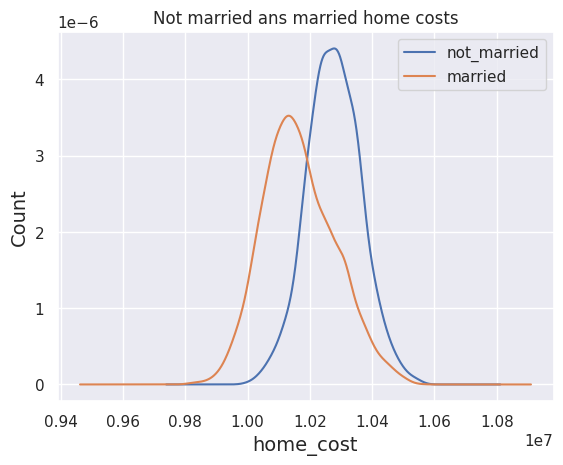

In [146]:
# нарисуем kernel density estimation (KDE)
not_married.plot.kde(label = 'not_married')
married.plot.kde(label = 'married')
plt.legend(loc='upper right')

plt.xlabel("home_cost", size=14)
plt.ylabel("Count", size=14)
plt.title("Not married ans married home costs")

 Судя по графику, у не бывших в браке дома дороже

In [148]:
not_married_mean = round(np.mean(not_married_df)) # средняя стоимость домов художников
married_mean = round(np.mean(married_df)) # средняя стоимость домов адвокатов

print(f'Средняя стоимость домов незамужних = {not_married_mean}, средняя стоимость домов замужних = {married_mean},'
      f'\n разница = {not_married_mean - married_mean}')

Средняя стоимость домов незамужних = 10277031, средняя стоимость домов замужних = 10165945,
 разница = 111086


Действительно, стоимость домов не бывших в браке намного дороде в среднем, чем у бывшиз в браке (на 111к).

<div class="alert alert-warning">
    
* Прада ли, что мужчины в среднем чаще бывают в браке, чем женщины?

**Подсказка** - воспользуйтесь критерием хи-квадрат из библиотеки scipy

In [3]:
from scipy import stats

In [4]:
# сформируем матрицу категорийных признаков (observed values)
dataset_table = pd.crosstab(data['sex'], data['was_married'])
observed_values = dataset_table.values
observed_values

array([[ 670, 1359],
       [ 278, 3693]])

In [5]:
dataset_table

was_married,0,1
sex,,
0,670,1359
1,278,3693


In [6]:
# найдем ожидаемые значения and chi2
chi2, p, dof, expected = stats.chi2_contingency(dataset_table)
print(f"chi2 statistic:     {chi2:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print(f"expected frequencies: \n{ expected}")

chi2 statistic:     681.47
p-value:            3.2004e-150
degrees of freedom: 1
expected frequencies: 
[[ 320.582 1708.418]
 [ 627.418 3343.582]]


In [7]:
# найдем chi2 по формуле
chi2 = sum([((o - e)**2)/e for o, e in zip(observed_values, expected)])
chi2_square_statistic = chi2[0] + chi2[1]
chi2_square_statistic

683.4247222953031

In [8]:
critical_value = stats.chi2.ppf(q = 0.95, df = 1)
print(critical_value)

3.841458820694124


In [39]:
dataset_table.iloc[0].values

array([ 670, 1359])

Хи-квадрат и p-value показывают, что мы отвергаем нулевую теорию о том, что мужчины и женщины в равной степени состоят в браке. Статистические тесты показывают, что есть связь между полом и семейным положением.

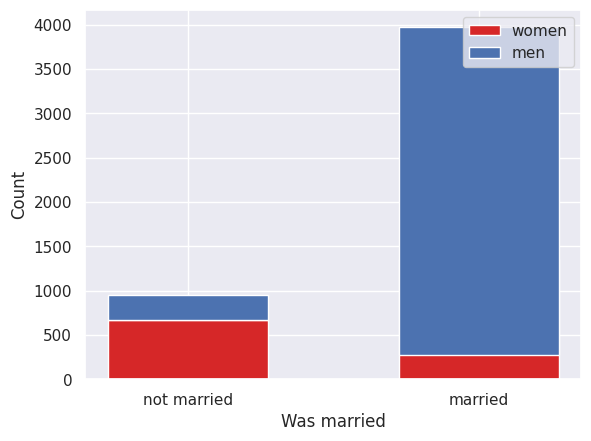

In [41]:
# Визуализируем сontingency Table, чтобы посомтреть направленность корреляции
marriage = ['not married', 'married']
p1 = plt.bar(marriage, dataset_table.iloc[0].values, 0.55, color='#d62728', label = 'women')
p2 = plt.bar(marriage, dataset_table.iloc[1].values, 0.55, bottom = dataset_table[0][:].values, label = 'men')
plt.legend(loc = 'upper right')
plt.xlabel('Was married')
plt.ylabel('Count')
plt.show()

По графику видно, что больше незамужних женщин, чем мужчин, и наоборот. Наша гипотеза подтвердилась.

# Гипотезы при множественном тестировании (10 баллов)

In [ ]:
# Подсказка: 
# - дисперсионнай анализ  f_oneway()
# - Крускал Уоллиса

<div class="alert alert-warning">
    
* Правда ли между представителями таких профессий как, **Homemaker**, **Marketing**, **Healthcare** и **Executive** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием. 

Чтобы выбрать между дисперсионным анализом и критерием Крускал Уоллиса, проверим нормальность распределения данных в группах

In [94]:
# разделим датасет на выборки
homemakers = data['salary'].where(data['profession']=='Homemaker').dropna()
marketing = data['salary'].where(data['profession']=='Marketing').dropna()
healthcare = data['salary'].where(data['profession']=='Healthcare').dropna()
executive = data['salary'].where(data['profession']=='Executive').dropna()

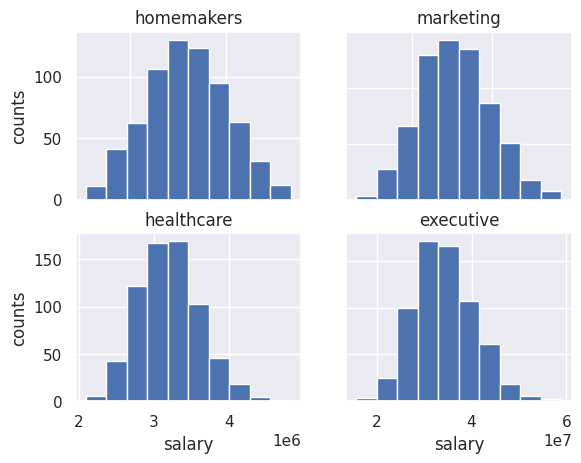

In [104]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(homemakers)
axs[0, 0].set_title('homemakers')
axs[0, 1].hist(marketing)
axs[0, 1].set_title('marketing')
axs[1, 0].hist(healthcare)
axs[1, 0].set_title('healthcare')
axs[1, 1].hist(executive)
axs[1, 1].set_title('executive')

for ax in axs.flat:
    ax.set(xlabel='salary', ylabel='counts')

for ax in axs.flat:
    ax.label_outer()

Из гистограмм видно, что все выборки имеют нормальное распределение

In [46]:
from scipy.stats import f_oneway

In [72]:
# для анализа наличия статистически значимой разницы между средними значениями групп используется 
# однофакторный дисперсионный анализ
f_oneway(homemakers, marketing, healthcare, executive)

F_onewayResult(statistic=12653.023319770617, pvalue=0.0)

P-value меньше 0.001, поэтому мы отвергаем нулевую гипотезу о том, что в среднем зарплаты групп не различаются. по крайней мере одно из средних значений генеральной совокупности отличается от других. Также мы видим высокое значение F-статистики, что означает высокую вариацию между средними результатами выборок. 

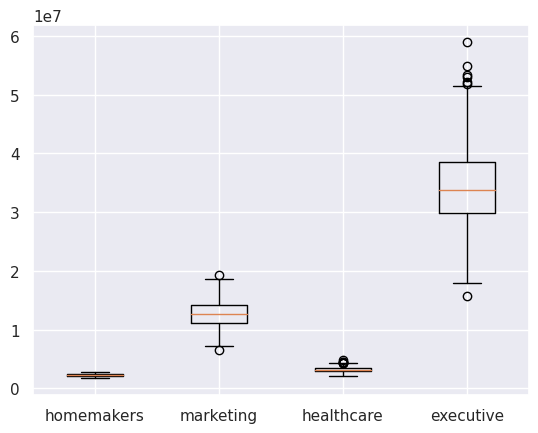

In [95]:
# Нарисуем ящики с усами
fig, ax = plt.subplots()
ax.boxplot([homemakers, marketing, healthcare, executive], labels = 
           ['homemakers', 'marketing', 'healthcare', 'executive'])

plt.show()

Диаграммы размаха показыват, что средние зарплаты соотносятся только у строителей и работников в сфере медицины.

<div class="alert alert-warning">
    
* Правда ли между представителями таких профессий как, **Doctor**, **Entertainment** и **Lawyer** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием. 

In [97]:
doctors = data['salary'].where(data['profession']=='Doctor').dropna()
entertainments = data['salary'].where(data['profession']=='Entertainment').dropna()
lawyers = data['salary'].where(data['profession']=='Lawyer').dropna()

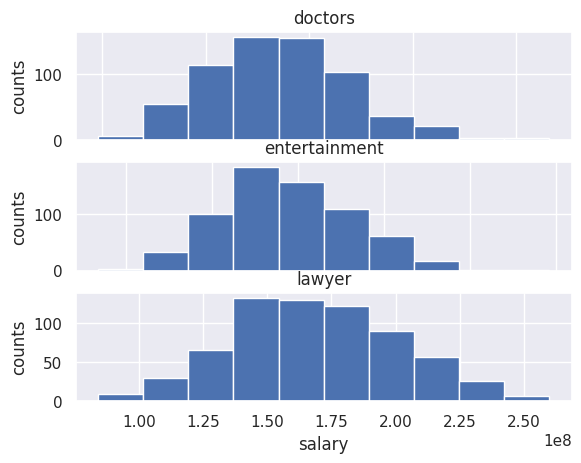

In [105]:
# Проверим нормлаьность распределения
fig, axs = plt.subplots(3)
axs[0].hist(doctors)
axs[0].set_title('doctors')
axs[1].hist(entertainments)
axs[1].set_title('entertainment')
axs[2].hist(lawyers)
axs[2].set_title('lawyer')


for ax in axs.flat:
    ax.set(xlabel='salary', ylabel='counts')

for ax in axs.flat:
    ax.label_outer()

In [106]:
f_oneway(doctors, entertainments, lawyers)

F_onewayResult(statistic=89.56052385242255, pvalue=5.67666591800931e-38)

p-value намного больше 0.05, поэтому не опровергаем нулевую гипотезу о том, что в среднем зарплаты равны

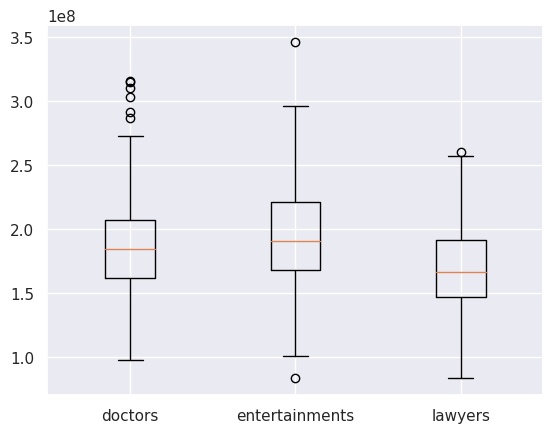

In [107]:
# Нарисуем ящики с усами
fig, ax = plt.subplots()
ax.boxplot([doctors, entertainments, lawyers], labels = 
           ['doctors', 'entertainments', 'lawyers'])

plt.show()

# Регрессионный Анализ (20 баллов)

Взглянем от чего зависит уровень счастья

In [6]:
import statsmodels.formula.api as smf

# Рекомендации: 
# Используйте библиотку statsmodels для оценки вклада каждого фактора
# Выведения отчета о модели - model.summary()

<div class="alert alert-warning">
    
Выполните следующие задания и на основе результатов ответьте на вопросы:

* Постройте регрессионную модель зависимости уровня счастья от приведенных факторов (was_married, children, salary, sex, age, home_cost)
* Существует ли связь между уровнем счастья и зарплатой?

* Насколько сильны эти отношения?

* Как факт брака способствуют стоимости недвижимости?

* Зная влияние каждого фактора, можем ли мы предсказать уровень счастья?

* Постройте график зависимостей целевой переменной от приведенных числовых факторов. 
    
* Какие признаки не влияют на уровень счастья? (стат. значимость)
    
* Какой признак самый сильный?
    
* Постройте график остатков. Всю ли информацию смогла извлечь ваша модель из данных?

* Наблюдается ли гетероскедастичность в остатках?
    
* Есть ли в данных автокоррелированность?  

In [7]:
model = smf.ols(formula='happyness ~ was_married + children + salary + sex + age + home_cost', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happyness   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     941.7
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:38:52   Log-Likelihood:                 4714.8
No. Observations:                6000   AIC:                            -9416.
Df Residuals:                    5993   BIC:                            -9369.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3000      0.048      6.239      0.000       0.206       0.394
was_married     0.0527      0.006      8.473      0.000       0.041       0.065
children        0.0090      0.001      8.982      0.000       0.007       0.011
salary       2.355e-10   3.07e-11      7.664      0.000    1.75e-10    2.96e-10
sex             0.0661      0.004     17.274      0.000       0.059       0.074
age             0.0018   7.45e-05     24.161      0.000       0.002       0.002
home_cost   -3.063e-09   4.71e-09     -0.651      0.515   -1.23e-08    6.16e-09
==============================================================================
Omnibus:                        0.031   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.985   Jarque-Bera (JB):                0.041
Skew:                           0.005   Prob(JB):                        0.980
Kurtosis:                       2.992   Cond. No.                     3.94e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Только стоимость дома не имеет статистического влияния на счастье (p-value больше 0.1), однако коэффициент при переменной "зарплата" очень низкий, поэтому также можно считать, что зарплата не влияет на уровень счастья.

Самый "сильный" признак - "пол", так как коэффициент принем = 0.0661. Другие "сильные" признаки - "был ли женат", "кол-во детей" и "возраст".

In [134]:
# Проверим корреляцию между фактом брака и стоимостью недвижимости
model2 = smf.ols('home_cost ~ was_married', data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              home_cost   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     85.12
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           3.82e-20
Time:                        00:51:34   Log-Likelihood:                -84376.
No. Observations:                6000   AIC:                         1.688e+05
Df Residuals:                    5998   BIC:                         1.688e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.028e+07   1.01e+04   1021.249      0.000    1.03e+07    1.03e+07
was_married -1.012e+05    1.1e+04     -9.226      0.000   -1.23e+05   -7.97e+04
==============================================================================
Omnibus:                    15193.322   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        206952202.707
Skew:                          28.130   Prob(JB):                         0.00
Kurtosis:                     911.099   Cond. No.                         4.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Факт брака имеет незначительное влияние на стоимость недвижимости.

In [8]:
# Зная влияние каждого фактора мы можем предсказать уровень счастья:
x = data.drop(['happyness','profession', 'drive_info'], axis = 1)
y_true = data['happyness']
y_predicted = model.predict(x)

In [61]:
# Сравним результаты
data['happyness_predicted'] = y_predicted 
data

,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness,happyness_predicted
id,,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499,0.582255
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234,0.504363
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142,0.524947
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987,0.326167
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579,0.667349
...,...,...,...,...,...,...,...,...,...,...
495,1,0.0,3.589436e+07,1,3.0,Executive,1.007038e+07,1.0,0.599222,0.401833
496,1,3.0,2.454208e+06,0,20.0,Homemaker,1.009348e+07,1.0,0.259710,0.385509
497,1,0.0,3.335405e+06,0,17.0,Healthcare,1.016696e+07,0.0,0.258779,0.352958


In [62]:
# Однако у модели маленький R-квадрат, поэтому нельзя сказать, что модель хорошо предсказывает уровень счастья
model.rsquared

0.4852820022463792

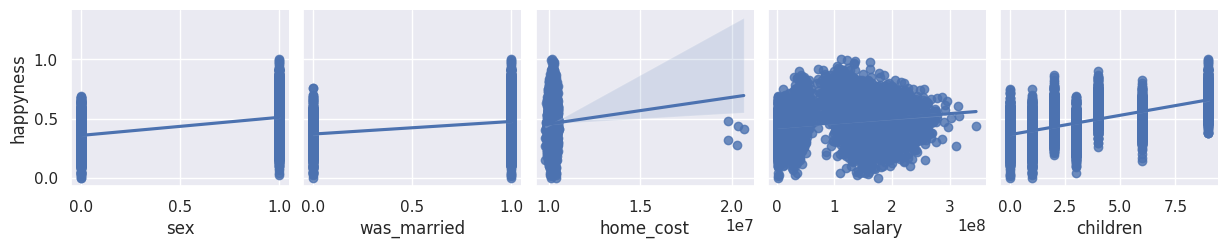

In [68]:
#построим график зависимостей целевой переменной
#выделенные переменные "пол", "кол-во детей", "был ли замужем" имеют влияние
sns.pairplot(data, y_vars = 'happyness', 
             x_vars = ['sex','was_married', 'home_cost','salary','children' ], kind = 'reg')

<AxesSubplot: >

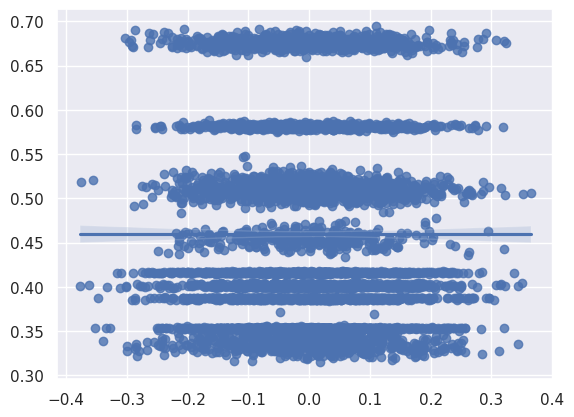

In [85]:
# построим график остатков
sns.regplot(x = residuals, y = y_predicted, data = None, scatter = True) 

По графику остатков видно, что модель извлекла не все данные, но не наблюдается гетероскедастичность. 

<AxesSubplot: >

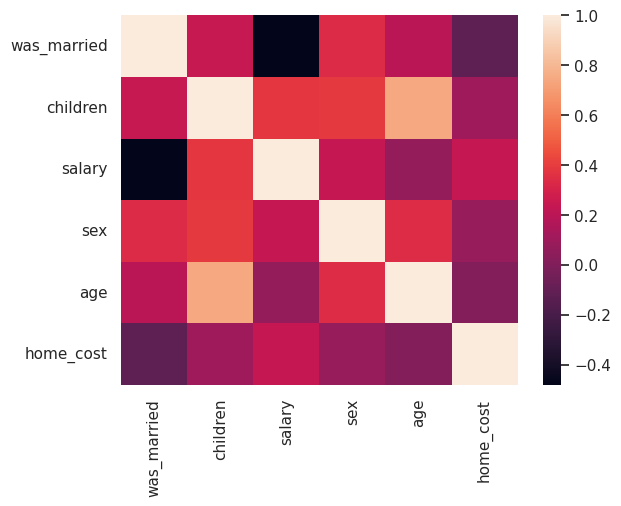

In [89]:
# Проверим мультиколлинеарность независимых переменных (автокорреляция есть только у time-sries данных?)
correlation = x.corr()
sns.heatmap(correlation)

Можно заметить корреляуию между возрастом и количеством детей.

In [91]:
# Построим модель без одного из признаков. Она не стала лучше
model = smf.ols(formula='happyness ~ was_married + children + salary + sex + home_cost', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happyness   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     923.5
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:30:55   Log-Likelihood:                 4435.9
No. Observations:                6000   AIC:                            -8860.
Df Residuals:                    5994   BIC:                            -8820.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3901      0.050      7.770      0.000       0.292       0.489
was_married     0.0010      0.006      0.156      0.876      -0.011       0.013
children        0.0280      0.001     42.097      0.000       0.027       0.029
salary      -1.101e-10   2.85e-11     -3.866      0.000   -1.66e-10   -5.43e-11
sex             0.0918      0.004     23.827      0.000       0.084       0.099
home_cost   -6.171e-09   4.93e-09     -1.252      0.211   -1.58e-08    3.49e-09
==============================================================================
Omnibus:                        1.269   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                1.233
Skew:                           0.014   Prob(JB):                        0.540
Kurtosis:                       3.065   Cond. No.                     3.93e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.93e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Дополнительные баллы (+10 баллов)
* Аккуратный и понятный код **+5 баллов**
* Присутствуют лаконичные и понятные комментарии **+5 балов**